In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
training_set=pd.read_csv('/content/GOOG.csv')
training_set

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,49.813286,51.835709,47.800831,49.982655,49.982655,44871300
1,2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942800
2,2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342800
3,2004-08-24,55.412300,55.591629,51.591621,52.239193,52.239193,15319700
4,2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232100
...,...,...,...,...,...,...,...
3804,2019-09-30,1220.969971,1226.000000,1212.300049,1219.000000,1219.000000,1404100
3805,2019-10-01,1219.000000,1231.229980,1203.579956,1205.099976,1205.099976,1273500
3806,2019-10-02,1196.979980,1196.979980,1171.290039,1176.630005,1176.630005,1615100
3807,2019-10-03,1180.000000,1189.060059,1162.430054,1187.829956,1187.829956,1621200


In [3]:
training_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3809 entries, 0 to 3808
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3809 non-null   object 
 1   Open       3809 non-null   float64
 2   High       3809 non-null   float64
 3   Low        3809 non-null   float64
 4   Close      3809 non-null   float64
 5   Adj Close  3809 non-null   float64
 6   Volume     3809 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 208.4+ KB


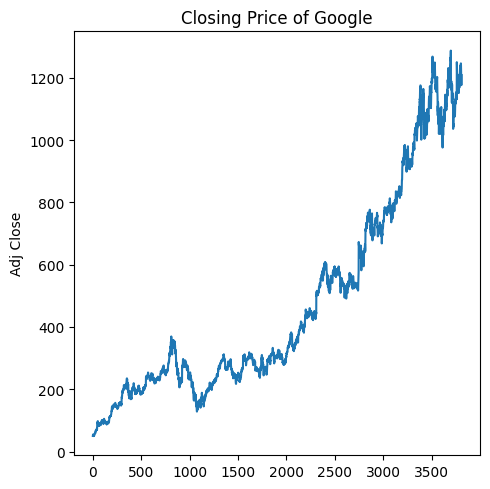

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 5))
plt.subplots_adjust(top=1.25, bottom=1.2)
training_set['Adj Close'].plot()
plt.ylabel('Adj Close')
plt.xlabel(None)
plt.title(f"Closing Price of Google")
plt.tight_layout()

Text(0.5, 1.0, 'Sales Volume')

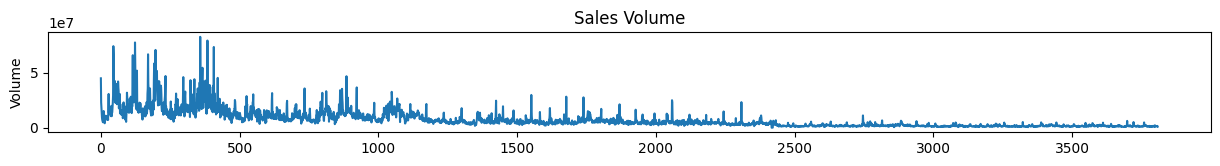

In [5]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(15, 20))
plt.subplots_adjust(top=1.25, bottom=1.2)
training_set['Volume'].plot()
plt.ylabel('Volume')
plt.xlabel(None)
plt.title(f"Sales Volume")

In [6]:
training_set=training_set.iloc[:,1:2].values

In [8]:
from sklearn.preprocessing import MinMaxScaler
sc= MinMaxScaler()
training_set=sc.fit_transform(training_set)

x_train= training_set[0:1257]
y_train= training_set[1:1258]

x_train=np.reshape(x_train, (1257 , 1 , 1))

In [9]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [10]:
regressor = Sequential()

regressor.add(LSTM(units=4, activation= 'sigmoid', input_shape= (None,1)))

regressor.add(Dense( units=1 ))

regressor.compile(optimizer='adam', loss='mean_squared_error')
regressor.fit(x_train, y_train, batch_size=32, epochs=200)

Epoch 1/200
40/40 [==============================] - 3s 2ms/step - loss: 0.5151
Epoch 2/200
40/40 [==============================] - 0s 2ms/step - loss: 0.3829
Epoch 3/200
40/40 [==============================] - 0s 2ms/step - loss: 0.2797
Epoch 4/200
40/40 [==============================] - 0s 2ms/step - loss: 0.2007
Epoch 5/200
40/40 [==============================] - 0s 2ms/step - loss: 0.1413
Epoch 6/200
40/40 [==============================] - 0s 2ms/step - loss: 0.0974
Epoch 7/200
40/40 [==============================] - 0s 2ms/step - loss: 0.0658
Epoch 8/200
40/40 [==============================] - 0s 2ms/step - loss: 0.0436
Epoch 9/200
40/40 [==============================] - 0s 2ms/step - loss: 0.0284
Epoch 10/200
40/40 [==============================] - 0s 2ms/step - loss: 0.0183
Epoch 11/200
40/40 [==============================] - 0s 2ms/step - loss: 0.0119
Epoch 12/200
40/40 [==============================] - 0s 2ms/step - loss: 0.0078
Epoch 13/200
40/40 [=================

In [12]:
test_set = pd.read_csv('/content/GoogleStockPrice_Test.csv')
real_stock_price = test_set.iloc[:,1:2].values

inputs = real_stock_price
inputs = sc.fit_transform(inputs)
inputs = np.reshape(inputs, (20 , 1, 1))
predicted_stock_price = regressor.predict(inputs)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

1/1 [==============================] - 0s 32ms/step


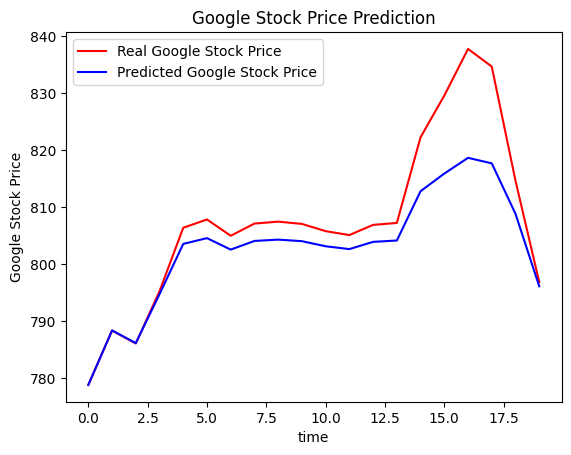

In [13]:
plt.plot( real_stock_price , color = 'red' , label = 'Real Google Stock Price')
plt.plot( predicted_stock_price , color = 'blue' , label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel( 'time' )
plt.ylabel( 'Google Stock Price' )
plt.legend()
plt.show()